# COMPLETED Q0, Q3, Q4
# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are constructed with decision nodes that show that a decision is to be made. Edges are the choices that each decision node may take. Terminal nodes are the outcomes at the bottom of the tree that is the prediction the tree gets to after going through the decision tree.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees split information into subgroups at a node based on its features. Linear models assume that whatever we are predicting can be linearly mapped, so it uses coefficients to weight each feature. Trees tend to perform better on non-linear relationships because of their flexibility in capturing interactions between different features. 

3. Why is the Gini a good loss function for categorical target variables? 

The Gini can capture how distinguished nodes are. We want our groups to be different from each other, and we want to reduce the impurity to find the best predictor. The Gini is a good loss function for categorical target variables because it measures how well the data is split based the target.

4. Why do trees tend to overfit, and how can this tendency be constrained? 

A tree can overfit if it continues to make splits to the point where it fits small details. This can be constrained if we truncate the tree and limit its depth, so it doesn't make splits on fine distinctions, and instead focuses on the main picture and more general observations.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

False. Trees also work well for regression and numerical variables because we can also add splits in numerical values, for example, splitting based on if a value is greater than or less than a specific threshold.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Having only 2 splits makes the model more simple and straightforward. This may reduce overfitting as well if there are too many decisions available at each node. 

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

We can first see the amount of nodes and decisions a tree has. If there are many nodes and branches, this may indicate overfitting as the tree may be trying to capture too many unnecessary details. If there are few nodes and levels, this may be underfitting as the tree is not capturing main turning points. 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.


In [144]:
# load in data
data = pd.read_csv('./Breast Cancer METABRIC.csv')
print(data.shape)
data.head()

# There are 2509 observations and 34 variables.

(2509, 34)


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

In [145]:
X = data[["Tumor Size", "Lymph nodes examined positive", "Age at Diagnosis", "Tumor Stage", "Chemotherapy", "Cancer Type Detailed"]]
X = pd.get_dummies(X, columns=["Tumor Stage", "Chemotherapy", "Cancer Type Detailed"], drop_first=False)
X.head()


,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage_0.0,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False
3,25.0,3.0,47.68,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
4,40.0,8.0,76.97,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False


3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

In [146]:
y = data['Overall Survival Status']
data_clean = data.dropna(subset=['Overall Survival Status'])
X = X.loc[data_clean.index]
y = y.loc[data_clean.index]

Accuracy:  0.6120906801007556 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,148,66
Living,88,95


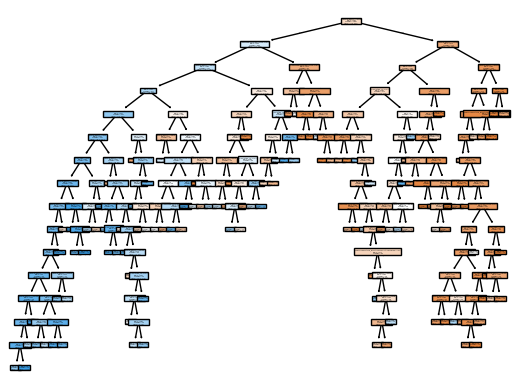

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
cart = DecisionTreeClassifier(min_samples_leaf=10, random_state=40)
cart.fit(X_train, y_train)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 


y_hat = cart.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

# The accuracy is 61.2%

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

In [148]:
# True positive rate 
tpr = (tab.iloc[1,1])/(tab.iloc[1,1]+tab.iloc[1,0])
print(f"True positive rate = {tpr}")

# True negative rate
tnr = (tab.iloc[0,0])/(tab.iloc[0,0]+tab.iloc[0,1])
print(f"True negative rate = {tnr}")

# The true negative rate performs better as it is higher, meaning the model is better at identifying negative cases. 
# (Though in this setting of cancer diagnostics, I think more accurately predicting positives may be more crucial.)

True positive rate = 0.5191256830601093
True negative rate = 0.6915887850467289


5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

Best min_samples_leaf: 116
Best R^2 on test set: 0.0682


Text(0.5, 1.0, 'True vs Predicted Overall Survival')

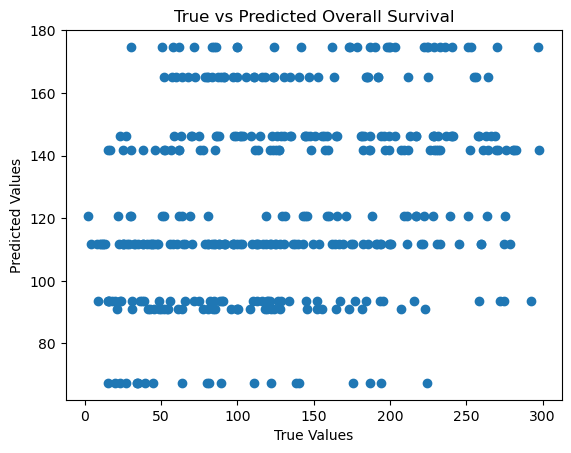

In [149]:
y = data['Overall Survival (Months)']
data_clean = data.dropna(subset=['Overall Survival (Months)'])
X = X.loc[data_clean.index]
y = y.loc[data_clean.index]

best_r2 = -100000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

for each in range(1, 120):
    cart = DecisionTreeRegressor(min_samples_leaf=each, random_state=40)
    cart.fit(X_train, y_train)
    y_hat = cart.predict(X_test)

    r2 = r2_score(y_test, y_hat)

    if r2 > best_r2:
        best_r2 = r2
        best_min_samples_leaf = each

print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Best R^2 on test set: {best_r2:.4f}")


final_tree = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=40)
final_tree.fit(X_train, y_train)

y_pred_final = final_tree.predict(X_test)

plt.scatter(y_test, y_pred_final)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Overall Survival')


I don't think my model would be suitable for clinical purposes. First of all, the r-squared is extremely low, meaning that the the variance in the target variable is basically not explained by the chosen features. 

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [150]:
data = pd.read_csv('./corporate_ratings.csv')
print(data.shape)
data.head()

# There are 2029 observations and 31 variables

(2029, 31)


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790




2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

(array([398., 671.,  89., 490., 302.,  64.,   1.,   5.,   7.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

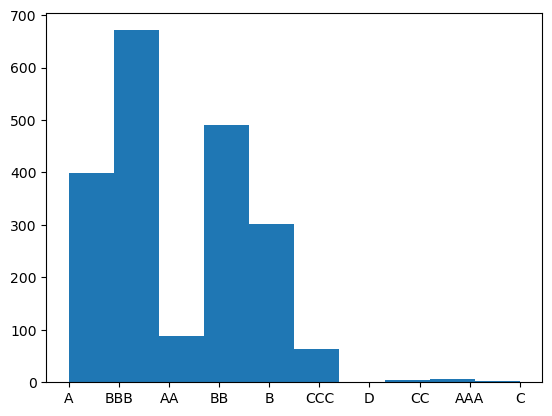

In [151]:
plt.hist(data['Rating'])

In [152]:
data.loc[data['Rating'].isin(['AAA', 'AA', 'A']), 'Rating'] = 'A'
data.loc[data['Rating'].isin(['BBB', 'BB', 'B']), 'Rating'] = 'B'
data.loc[data['Rating'].isin(['CCC', 'CC', 'C']), 'Rating'] = 'C'

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

In [153]:
data1 = data
X = data.drop(columns=["Rating", "Date", "Name", "Symbol", "Rating Agency Name"])
X = pd.get_dummies(X, columns=["Sector"], drop_first=False)
X.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?


Accuracy:  0.7364532019704434 



col_0,A,B
Rating,,
A,51,56
B,38,248
C,2,10
D,0,1


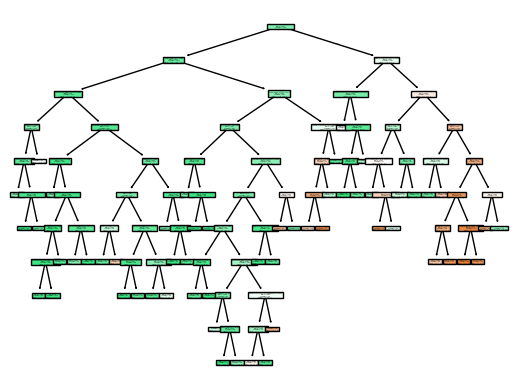

In [154]:
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
cart = DecisionTreeClassifier(min_samples_leaf=20)
cart.fit(X_train, y_train)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 

y_hat = cart.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

# The accuracy is 73.6%


5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

Accuracy:  0.7832512315270936 



col_0,A,B
Rating,,
A,57,50
B,25,261
C,0,12
D,0,1


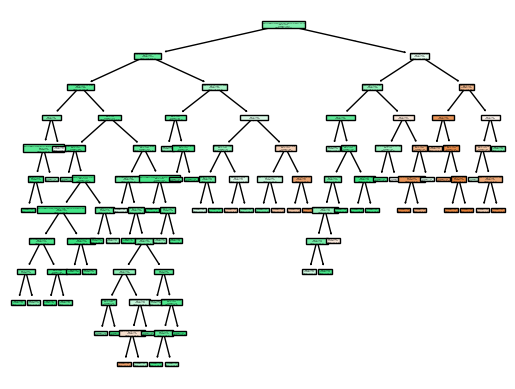

In [156]:
X = data.drop(columns=["Rating", "Date", "Name", "Symbol"])
X = pd.get_dummies(X, columns=["Sector", "Rating Agency Name"], drop_first=False)

y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
cart = DecisionTreeClassifier(min_samples_leaf=20)
cart.fit(X_train, y_train)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 

y_hat = cart.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

# The accuracy is 78.3%

By including the rating agency, the accuracy got higher. This could introduce bias though because rating agencies may already have underlying rating patterns that the model may follow. 

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?